## Implementation details :

1) I will be using MLP for classifying MNIST digits. a. Let us consider a MLP network with H hidden units, O outputs, and
inputs of size D.

2) According to above description, dimensions of network will be :
```
 W - H * D+1   -- Weights from Input layer to Hidden layer
 V - K * H+1   -- Weights from Hidden layer to Output layer
 X - N * D+1   -- Weights of Input data
 Y - N * K     -- Weights of Output label data
 Z - H+1 * 1   -- Hidden layer Weights
 O - K * 1     -- Output layer weights
```
3) Please note that +1 in above notations is to indicate bias term.

4) tanh is used as the activation function.

5) During forward pass will be :

$\mathbf{z}=\tanh (\mathbf{W} \mathbf{x})$

and $O_{i}=\frac{\exp v_{i}^{T} z}{\sum_{k=1}^{K} \exp v_{k}^{T} z}$

Overall loss function will be :

Total loss = $-\sum_{n=1}^{N} \sum_{i=1}^{K} y_{n i} \log O_{n i}$





# Note : 

1) All weight update equations during back propogation should be done using $\textbf{Matrix operations}$ only (not for loops).

 For example : 
 
![MLP implementation diagram](pictures/equation.png)





Started calculating Training error in 5 Trails for each epoch with Batch size = 25 
Started calculating Validation error in 5 Trails for each epoch with Batch size = 25 
Training Error for 100th epoch for Trail Number : 1
Training error after  epoch : 1 here every batch size = 25
21.05386598628239
Validation error after  epoch : 1 here batch size = 25
1275.7395616426993
Training error after  epoch : 2 here every batch size = 25
9.286845427427112
Validation error after  epoch : 2 here batch size = 25
1178.186022643313
Training error after  epoch : 3 here every batch size = 25
7.474558167949807
Validation error after  epoch : 3 here batch size = 25
1132.1494760458413
Training error after  epoch : 4 here every batch size = 25
6.5495128704085195
Validation error after  epoch : 4 here batch size = 25
1101.4010851108555
Training error after  epoch : 5 here every batch size = 25
5.95423224393919
Validation error after  epoch : 5 here batch size = 25
1076.4808976435465
Training error after  ep

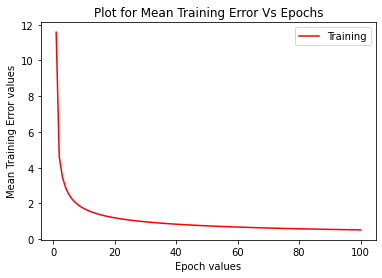

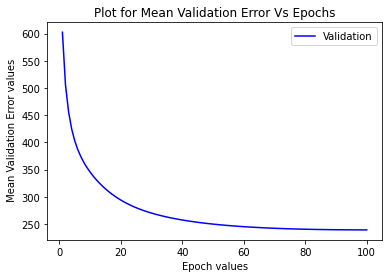

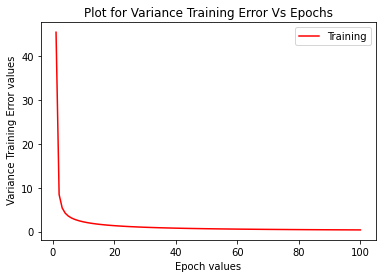

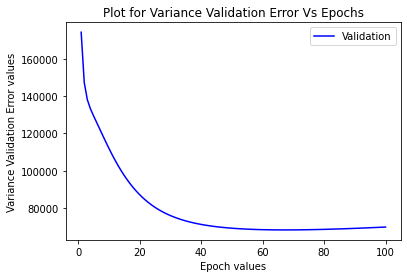

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from math import sqrt

# Dimension of all the Matrices Used
# W - H * D+1   -- Weights from Input layer to Hidden layer
# V - K * H+1   -- Weights from Hidden layer to Output layer
# X - N * D+1   -- Weights of Input data
# Y - N * K     -- Weights of Output label data
# Z - H+1 * 1   -- Hidden layer Weights
# O - K * 1     -- Output layer weights


# Function to read data and store it in form of 2D array
def read_data(file_name) :
    data = np.loadtxt(file_name, delimiter=',')
    return data


# Implementation of Forward pass function
def forward_pass(data_points,W,V,Y) :
    # use compute_Z_values, compute_O_values, compute_softmax, calculate_error to compute error, O_softmax
    # During forward pass compute Z values, O_values, O_softmax, error
   
    z_vals = compute_Z_values(W,data_points) 
    output_matrix = compute_O_values(V,z_vals)
    O_softmax = compute_softmax(output_matrix)
    error =  calculate_error(O_softmax, Y, epsilon=1e-10)
    #return the error, O_softmax
    return error,O_softmax


# Implementation of Cross Entropy Error Function takes as input O_softmax, Y
def calculate_error(predictions, targets, epsilon=1e-10):
    # Caculate cross entropy error between output of softmax (predictions) , actual values (targets)
    
    for i in range(len(predictions)):
     for j in range(len(predictions[i])):
      if (predictions[i][j]==0):
        predictions[i][j] = epsilon

    lg= np.log(predictions)
    cross_entropy = np.multiply(lg.T,targets)
    cross_entropy_error = -1*np.sum(cross_entropy)
    #returns cross entropy error
    return cross_entropy_error


# Implementation of Softmax Error Function takes as input O
def compute_softmax(output_matrix) :
    # return output_matrix after apply softmax function ( hint: use np.exp function )
    y_length = 10
    
    exponentials = np.exp(output_matrix)
    sum_exponentials = sum(exponentials)
    result = exponentials/sum_exponentials
    # returns output_matrix
    output_matrix = result
    return output_matrix


# Implementation of Backward pass using Backpropagation Algorithm to calculate V_new, W_new, bias_v
def backward_pass(O_softmax,Y,V,Z,W,X,bias_z):
    # use gradient_hidden_to_output, gradient_input_to_hidden functions to compute V_new, bias_v, W_new 
    
    W_new = gradient_input_to_hidden(O_softmax,Y,V,Z,X)
    V_new, bias_v = gradient_hidden_to_output(O_softmax,Y,Z,bias_z)
    #returns V_new, W_new, bias_v
    return  W_new,V_new,bias_v


#Implementation of Graident back propogation from Hidden to Input Layer
def gradient_hidden_to_output(O_softmax,Y,Z,bias_z) :
    # function to update V values using backpropogation using matrix operations.
    
    final_result_matrix = np.dot(Z,(O_softmax.T-Y))  #result final value means the updated V
    
    
    bias_v = np.dot(O_softmax-Y.T,bias_z)
    
    return final_result_matrix.T,bias_v

#Implementation of Graident back propogation from Input to Hidden Layer
def gradient_input_to_hidden(O_softmax,Y,V,Z,X) :
    # function to update W values using backpropogation using only matrix operations.
   
    # since W is not in the arguements, I take that this is just the change i.e del W
    """print(O_softmax.shape)
    print(Y.shape)
    print(V.shape)
    print(Z.shape)
    print(X.shape)
    toto = O_softmax.T-Y
    zz = np.empty(shape=O_softmax.shape)
    zz.fill(1)
    temp1 = zz-O_softmax
    temp2 = np.dot(temp1,O_softmax.T)
    rj = np.multiply(Z,Z)
    ek = np.empty(shape = rj.shape)
    temp3= ek-rj
    gfg = np.dot(toto,temp2)
    ff = np.dot(gfg,V)
    temp4 = np.multiply(ff.T,temp3)
    result_matrix = np.dot(temp4,X) #temp4"""
    toto = O_softmax.T-Y
    Vj = np.delete(V,0,axis=1)
    temp1= np.dot(toto,Vj)
    Zi = Z
    rj = np.multiply(Zi,Zi)
    ek = np.empty(shape = rj.shape)
    temp3= ek-rj
    temp2 = np.multiply(temp1.T,temp3)
    result_matrix = np.dot(temp2,X)
    
    return result_matrix*-1



# Function to calculate Z values during forward pass
def compute_Z_values(weights,data_points) :
    # function to update Z during forward pass using matrix operations.
  
    z_values = np.tanh(np.dot(weights,data_points.T))
    #return calculated z_values
    return z_values


# Function to Calculate output matrix during forward pass
def compute_O_values(weights,z_values) :
    # function to update O during forward pass using matrix operations.
    
    tt = np.insert(z_values,1,1,axis=0)
    o_values= np.dot(weights,tt)
    return o_values



# Function to Intialise weights with bias term
def initilaise_weights(data) :
    # function to append bias term.
    
    final_data = np.insert(data,1,1,axis=1)
    return final_data



# To intiliase random weights to Matrices such as W, V
def random_weights(number_of_rows,number_of_columns) :
    # Function to assign random weights to W, V
  
    new_data = np.zeros((number_of_rows, number_of_columns))#gives a skeleton structure
    for i in range(number_of_rows):
      for j in range(number_of_columns):
        new_data[i][j] = np.random.normal(loc=0,scale=1.0/sqrt(number_of_rows)) #A heuristic which helps in backpropogation later 
    # return random weights with number_of_rows * number_of_columns
    return new_data


# To divide the data into test train data
# I am assuming we cannot use the sklearn helper function train_test_split() so just using python coding from scratch 
def train_test_split(X,Y,fraction) : 
    # Function to divide train, validation and test data based on fraction. let fraction = 0.8 then train = 0.75, validation= 0.05 and test = 0.2 
     
    train_split_pt = int(fraction * len(X))
    X_train, test_data_x = X[:train_split_pt], X[train_split_pt:]
    y_train, test_data_y = Y[:train_split_pt], Y[train_split_pt:]
    train_valid = int(0.75/0.8*len(X_train)) #how much of the taken train_X goes in validation and training 
    data_train_x,validation_data_x = X_train[:train_valid],X_train[train_valid:]
    data_train_y,validation_data_y = y_train[:train_valid],y_train[train_valid:]

    # return data_train_x,data_train_y,validation_data_x,validation_data_y,test_data_x,test_data_y
    return data_train_x,data_train_y,validation_data_x,validation_data_y,test_data_x,test_data_y


# Shuffle in same order for X,Y
def shuffle(a, b, seed):  #random was itself imported in the python notebook already so I used it
   # to Shuffle in same order for X,Y based on seed

   random.Random(seed).shuffle(a)
   random.Random(seed).shuffle(b) 
   # return shuffled values a,b in same order
   return a,b


if __name__ == "__main__" :
    data = read_data("data.txt")
    Y = read_data("label.txt")
    X = initilaise_weights(data)
    W = random_weights(500,401)
    V = random_weights(10,501)
    
    Z = compute_Z_values(W,X[:25,:])
  
    O = compute_O_values(V,Z) #clear till here I appended in the function only and returned the multiply
    bias_z = np.empty(shape=(25, 1))
    bias_z.fill(1.0)
    i=0
    learning_rate = 0.01
    train_test_fraction  = 0.80
    train_validation_split = 0.20
    train_data_x,train_data_y,validation_data_x,validation_data_y,test_data_x,test_data_y =train_test_split(X,Y,train_test_fraction)
    number_of_epocs=100
    train_error_epoch = []*(5*number_of_epocs)
    #X = train_data_x
    #Y = train_data_y
    #Dividing the data into training data and test data into 0.8 ratio same ration for train and validation data,values below correspond to 0.8 ratio
    train_data_len = 3200
    validation_data_len = 800
    test_data_len =1000
    validation_error_epoch = [] * (5*number_of_epocs)
    # Running for 5 trails using 100 Epocs and Batch size = 25
    batch_size = 25
    print("Started calculating Training error in 5 Trails for each epoch with Batch size = 25 ")
    print("Started calculating Validation error in 5 Trails for each epoch with Batch size = 25 ")
    # Different trails are performed for 5 times.
    # 5 different trails
    for k in range(5) :
        W = random_weights(500, 401)
        V = random_weights(10, 501)
        error_train=0
        error_validation = 0
        # Randomising the data
        seed = random.randint(10000,10000000)
        X,Y = shuffle(X,Y,seed)
        print("Training Error for 100th epoch for Trail Number : "+str(k+1))
        for j in range(number_of_epocs) :
            i=0
            count=0
            error_train = 0.0
            error_validation = 0.0
            #X,Y = shuffle(X,Y,12345)
            while i < (train_data_len)  :
                i1=i
                # Batch size is 25
                i= i+25
                error,O_softmax=forward_pass(X[i1:i, :], W, V, Y[i1:i, :])
                W_new,V_new,bias_v=backward_pass(O_softmax,Y[i1:i,:],V,Z,W,X[i1:i,:],bias_z)
                #print(W_new.shape)
                W = W - (learning_rate/25)*W_new
                #print(W)
                V_new = np.append(learning_rate*bias_v,V_new,axis=1)
                V = V - (learning_rate/25)*V_new
                error_train+= error
                count+=1
                #print(error1)
                #print(V.shape)
            #print(error)
            #print(j)
            error, O_softmax = forward_pass(X[0:3200, :], W, V, Y[0 : 3200, :])
            error1, O_softmax = forward_pass(X[3200:4000, :], W, V, Y[3200:4000, :])
            error_validation = error1
            count = train_data_len/batch_size
            count1= validation_data_len/batch_size
            error_train = error_train/count
            print("Training error after  epoch : "+str(j+1)+" here every batch size = 25")
            print(error_train)
            print("Validation error after  epoch : "+str(j+1)+" here batch size = 25")
            print(error_validation)
            train_error_epoch.append(error_train)
            validation_error_epoch.append(error_validation)
    print("\n")
    print("Final Training Errors after 5 trails and 100 Epocs : ")
    print(train_error_epoch)
    print("\n")
    print("Final Validation Errors after 5 trails and 100 Epocs : ")
    print(validation_error_epoch)
    mean_training = []
    variance_training = []
    mean_validation = []
    variance_validation = []
    train_error_epoch = np.reshape(train_error_epoch,(5,number_of_epocs))
    validation_error_epoch = np.reshape(validation_error_epoch,(5,number_of_epocs))
    mean_training = np.mean(train_error_epoch, axis=0)
    mean_validation = np.mean(validation_error_epoch,axis=0)
    variance_training = np.var(train_error_epoch,axis=0)
    variance_validation = np.var(validation_error_epoch,axis=0)
    mean_training = np.reshape(mean_training,(number_of_epocs,))
    mean_validation = np.reshape(mean_validation, (number_of_epocs))
    variance_training = np.reshape(variance_training,(number_of_epocs,))
    variance_validation = np.reshape(variance_validation,(number_of_epocs,))
    epochs = []
    for i in range(1,number_of_epocs+1) :
        epochs.append(i)
    print("\n")
   
    print("Plots are started to Generate In Figures Folder : ")
    """plt.figure()
    plt.plot(epochs,mean_training, color='red', label='Training')
    plt.ylabel("Training error values")
    plt.xlabel("Epoch values")
    plt.title("Plot for Training Error Vs Epochs")"""
    #plt.savefig("abc.png")
    #files.download("abc.png") 
    #location = "./figures/lab3.a_TrainingError" + ".png"
    #plt.savefig(location)
    #plt.close()
    """"plt.figure()
    plt.plot(epochs, mean_validation,color='blue', label='Validation')
    plt.ylabel("Validation Error values")
    plt.title("Plot for Training,Validation Error Vs Epochs")
    plt.legend(loc='best')"""
    #plt.savefig("abcd.png")
    #files.download("abcd.png") 
    #location = "./figures/lab3.a_TrainingAndValidationError" + ".png"
    #plt.savefig(location)
    #plt.close()
    #plt.ylim(0.0145,0.01465)
    plt.figure()
    plt.plot(epochs, mean_training, color='red', label='Training')
    plt.xlabel("Epoch values")
    plt.ylabel("Mean Training Error values")
    plt.title("Plot for Mean Training Error Vs Epochs")
    #location = "./figures/lab3.a_MeanTrainingError" + ".png"
    plt.legend(loc='best')
    #plt.savefig(location)
    #plt.savefig("abcdd.png")
    #files.download("abcdd.png") 
    #plt.close()
    plt.figure()
    #plt.ylim(0.0133, 0.134)
    plt.plot(epochs, mean_validation, color='blue', label='Validation')
    plt.xlabel("Epoch values")
    plt.ylabel(" Mean Validation Error values")
    plt.title("Plot for Mean Validation Error Vs Epochs")
    #location = "./figures/lab3.a_MeanValidationError" + ".png"
    plt.legend(loc='best')
    #plt.savefig(location)
    #plt.savefig("abcdddd.png")
    #files.download("abcdddd.png") 
    #plt.close()
    #plt.ylim(0.000240, 0.000242)
    plt.figure()
    plt.plot(epochs, variance_training, color='red', label='Training')
    plt.xlabel("Epoch values")
    plt.ylabel(" Variance Training Error values")
    plt.title("Plot for Variance Training Error Vs Epochs")
    #location = "./figures/lab3.a_VarianceTrainingError" + ".png"
    plt.legend(loc='best')
    #plt.savefig(location)
    #plt.close()
    #plt.savefig("ab.png")
    #files.download("ab.png") 
    #plt.ylim(0.000210, 0.000211)
    plt.figure()
    plt.plot(epochs, variance_validation, color='blue', label='Validation')
    plt.xlabel("Epoch values")
    plt.ylabel("Variance Validation Error values")
    plt.title("Plot for Variance Validation Error Vs Epochs")
    #location = "./figures/lab3.a_VarianceValidationError" + ".png"
    plt.legend(loc='best')
    #plt.savefig(location)
    #plt.close()
    #plt.savefig("a.png")
    #files.download("a.png") 
    print("\n")
    print("Plots are Generated Successfully In Figures folder")



**Observations from the plots :**

 As we see the loss decreases exponentially as we increase the epochs. Both the training and mean training loss and the validation and mean validation loss are decreasing exponentially.
 
  We can also observe that the Variance is decreasing exponentially for the validation variance and the training variance which shows that the spread of values is shrinking quickly which is a very good sign as we generally need a model with decreasing variance. 
  
The loss decreases with the increase in the epocs validates that the weight update equations are correct and backpropagation is working as needed. I was able to bring don the training loss from initial 21 to 0.047 and validation loss from initial value of 1275 to 24.889 which is  a good improvement.